# Unit 5 - Financial Planning


In [38]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from datetime import date
%matplotlib inline

In [39]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library



In [40]:
# Set current amount of crypto assets
# YOUR CODE HERE!
crypto={"BTC": 1.2, "ETH": 5.3}
#print(crypt["BTC"])



In [41]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [42]:
# Fetch current BTC price
# YOUR CODE HERE!
BTC=requests.get(btc_url).json()
#print(json.dumps(BTC,indent=4))
BTC_px=BTC["data"]["1"]["quotes"]["USD"]["price"]
#print(BTC_px)
# Fetch current ETH price
# YOUR CODE HERE!]

ETH=requests.get(eth_url).json()
#print(json.dumps(BTC,indent=4))
ETH_px=ETH["data"]["1027"]["quotes"]["USD"]["price"]
#print(ETH_px)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=crypto["BTC"]*BTC_px
my_eth_value=crypto["ETH"]*ETH_px
my_btc=crypto["BTC"]
my_eth=crypto["ETH"]
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $16936.73
The current value of your 5.3 ETH is $2131.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [43]:
# Current amount of shares
# YOUR CODE HERE!
my_agg=200
my_spy=50

In [44]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

api=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [45]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
today=pd.Timestamp(date.today(),tz="America/New_York").isoformat()
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
closing_px= api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Preview DataFrame
# YOUR CODE HERE!
closing_px

AGG                                       SPY  \
                            open    high     low    close   volume    open   
2020-11-04 00:00:00-05:00  117.9  118.04  117.83  117.925  4510329  340.86   

                                                               
                             high     low    close     volume  
2020-11-04 00:00:00-05:00  347.94  339.59  343.495  101560371

In [46]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
AGG_px=closing_px["AGG"]["close"].item()
SPY_px=closing_px["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_px}")
print(f"Current SPY closing price: ${SPY_px}")

Current AGG closing price: $117.925
Current SPY closing price: $343.495


In [47]:
# Compute the current value of shares
# YOUR CODE HERE!
SPY_value=my_spy*SPY_px
AGG_value=my_agg*AGG_px

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${SPY_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_value:0.2f}")

The current value of your 50 SPY shares is $17174.75
The current value of your 200 AGG shares is $23585.00


### Savings Health Analysis

In [48]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000

# Create savings DataFrame
# YOUR CODE HERE!
crypto_value=my_btc_value+my_eth_value
stock_value=SPY_value+AGG_value
savings=pd.DataFrame({"amount":{"crypto":crypto_value,"shares":stock_value}})


# Display savings DataFrame
display(savings)

,amount
crypto,19068.07
shares,40759.75


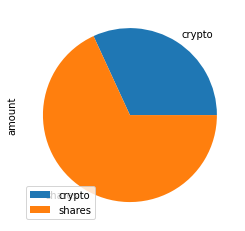

In [49]:
# Plot savings pie chart
# YOUR CODE HERE!
savings.plot.pie(y="amount")

In [50]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=savings["amount"].sum()
#print(total_savings)

# Validate saving health
# YOUR CODE HERE!
if total_savings>emergency_fund:
    print("Congrats! you have enough money in your emergency fund")
elif total_savings==emergency_fund:
    print("Congrats! you have reached the financial goal of having enough in your emergency fund")
else:
    print(f"Your savings are less than the target. You are ${(emergency_fund - total_savings):0.2f}")



Congrats! you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [51]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [52]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data= api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [53]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims=500

MC_stocks=MCSimulation(
    portfolio_data=df_stock_data,
    num_simulation=num_sims,
    num_trading_days=252*30

)


In [54]:
# Printing the simulation input data
# YOUR CODE HERE!
df_stock_data.head()


AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [55]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003162,1.003613,1.002057,1.002447,0.984981,0.996397,0.996790,1.006628,1.001714,0.996202,...,0.993653,0.997884,0.989306,0.997314,1.001478,0.997138,1.004430,1.000037,1.006949,1.005355
2,1.010609,1.003289,1.002328,1.009998,0.991241,0.999076,0.995321,1.018457,0.991000,0.999650,...,0.996617,0.994514,0.989367,0.988741,0.995066,1.001928,1.009585,0.989687,1.011365,1.008873
3,0.996016,1.001966,1.002864,1.018374,0.999677,0.997439,0.994293,1.011471,1.006414,0.995905,...,0.993762,0.991602,0.996401,0.990664,0.989571,1.003109,1.012667,0.988429,1.013905,1.008899
4,0.988280,1.000681,1.013314,1.019197,1.001634,1.007684,0.987671,1.013791,1.001041,0.991948,...,0.990357,0.994661,1.000810,0.999584,0.976291,1.002612,1.014080,0.993507,1.005923,1.011274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.443535,10.632662,3.076094,2.575826,8.398248,12.602685,3.784756,7.728692,2.612665,3.424779,...,1.146691,5.269576,5.430894,5.283348,5.200032,4.652863,15.637147,3.850806,4.527174,4.290452
7557,8.454190,10.626315,3.127821,2.571855,8.437681,12.607265,3.779947,7.701115,2.613279,3.430373,...,1.145133,5.236130,5.385426,5.270847,5.260002,4.628244,15.633614,3.868995,4.578808,4.271692
7558,8.464724,10.585860,3.124067,2.584646,8.450622,12.613319,3.837815,7.697672,2.641257,3.423081,...,1.142802,5.278698,5.429619,5.259795,5.247546,4.610644,15.682653,3.871411,4.558610,4.253624
7559,8.546585,10.649943,3.101134,2.579283,8.462255,12.778837,3.829653,7.684433,2.651582,3.418831,...,1.144741,5.285126,5.482528,5.249501,5.204114,4.559210,15.689907,3.857188,4.574188,4.250168


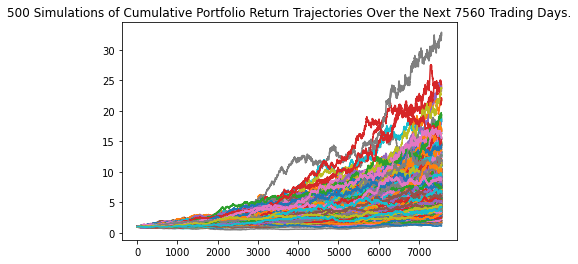

In [56]:
# Plot simulation outcomes
# YOUR CODE HERE!

MC_stocks.plot_simulation();


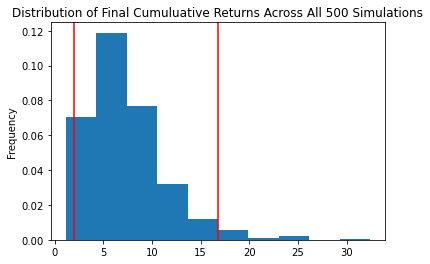

In [57]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

MC_stocks.plot_distribution()


### Retirement Analysis

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl=MC_stocks.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              7.326576
std               4.028150
min               1.136492
25%               4.512307
50%               6.440801
75%               9.128832
max              32.422184
95% CI Lower      2.003202
95% CI Upper     16.807376
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [59]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $40064.05 and $336147.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [60]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $60096.07 and $504221.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [61]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
num_sims=500

MC_stocks=MCSimulation(
    portfolio_data=df_stock_data,
    num_simulation=num_sims,
    num_trading_days=252*5

)



In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000456,1.003742,1.001598,0.990855,0.993370,1.009817,0.995415,1.004063,0.996241,0.997226,...,1.008366,1.007712,1.009322,1.003323,0.997565,1.001907,0.991900,1.011123,0.995514,1.008261
2,0.997704,1.001726,0.999408,0.983865,0.993735,1.014980,1.014382,1.000492,0.998015,0.996743,...,1.010670,1.010983,1.000515,1.007299,1.005898,1.008801,0.983400,1.023693,0.998046,1.004196
3,0.994863,1.005836,1.000324,0.988254,0.996349,1.017006,1.011196,1.005456,0.991379,0.990912,...,1.006407,1.007520,1.007144,1.015615,1.002013,1.007868,0.996689,1.031474,1.005909,1.000023
4,0.991100,1.003873,1.006558,1.004292,0.996860,1.013099,1.016621,1.012877,0.992808,0.991185,...,1.011405,1.013515,1.007049,1.018459,0.999607,1.015119,0.991326,1.038374,1.002741,1.004959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.023551,1.575679,1.758043,1.658051,1.227800,1.419860,1.489607,1.300314,1.796832,1.144588,...,2.191136,2.005931,1.352240,1.077003,1.294395,1.048411,1.414301,1.079099,1.328120,1.289345
1257,1.023027,1.587665,1.764657,1.648120,1.238552,1.410362,1.477085,1.302842,1.802449,1.153200,...,2.195079,2.003769,1.346941,1.077631,1.308495,1.054472,1.417955,1.083413,1.329145,1.293970
1258,1.030872,1.588495,1.766789,1.638845,1.215773,1.412354,1.467264,1.320139,1.800332,1.157333,...,2.202709,2.014593,1.338010,1.063556,1.315308,1.047792,1.426756,1.092259,1.316388,1.284924
1259,1.030864,1.573717,1.781948,1.625999,1.217819,1.421009,1.482422,1.319166,1.809509,1.168176,...,2.216182,1.989442,1.349079,1.066482,1.325852,1.047183,1.452736,1.093548,1.323349,1.271230


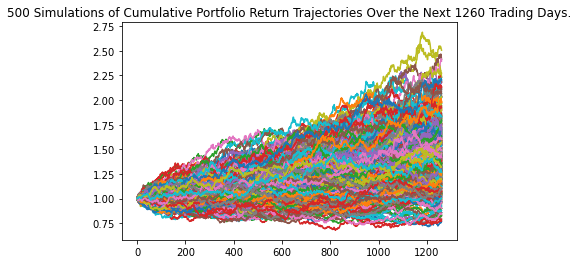

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!

MC_stocks.plot_simulation();

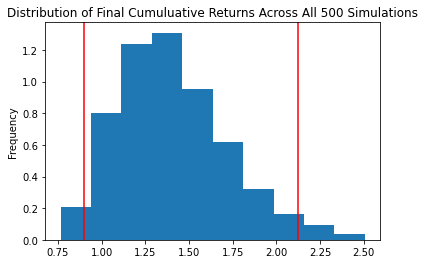

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stocks.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl=MC_stocks.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl)

count           500.000000
mean              1.407319
std               0.309608
min               0.764462
25%               1.194109
50%               1.370064
75%               1.590550
max               2.506515
95% CI Lower      0.899914
95% CI Upper      2.123217
Name: 1260, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 20000 * 1.5


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five=round(tbl[8]*initial_investment,2)
ci_upper_five=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $26997.41 and $63696.5


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


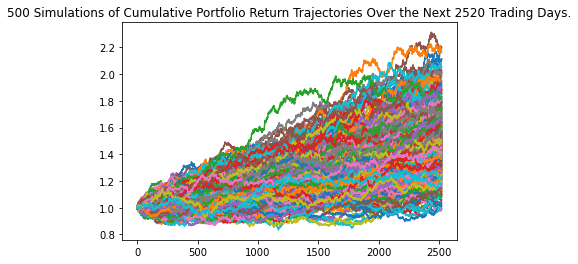

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

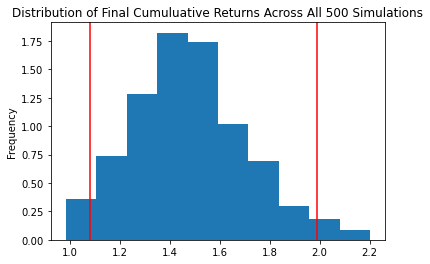

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
